In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
# read in all the articles
f = open('./years.txt', "r")
article_names = [fname.strip() for fname in f.readlines()] 

articles = []
for yname in article_names:
    fname = f"path to _sentiments files"
    try:
        df = pd.read_csv(fname)
        articles.append(df)
    except:
        continue
sentiments_df = pd.concat(articles)

In [4]:
sentiments_df['weighted_index_dm'] = sentiments_df['weighted_index_neg'] - sentiments_df['weighted_index_neg'].mean()

In [5]:
sentiments_df[sentiments_df['Year'] == 2002][['YearMon', 'weighted_index_dm']]

,YearMon,weighted_index_dm
0,2002-01-01,0.230368
1,2002-02-01,0.157985
2,2002-03-01,0.553333
3,2002-04-01,0.021514
4,2002-05-01,0.236719
5,2002-06-01,-0.196457
6,2002-07-01,-0.196311
7,2002-08-01,-0.004153
8,2002-09-01,-0.442927
9,2002-10-01,-0.004929


In [6]:
sentiments_df[sentiments_df['Year'] == 2002][['YearMon', 'weighted_index_dm']]

,YearMon,weighted_index_dm
0,2002-01-01,0.230368
1,2002-02-01,0.157985
2,2002-03-01,0.553333
3,2002-04-01,0.021514
4,2002-05-01,0.236719
5,2002-06-01,-0.196457
6,2002-07-01,-0.196311
7,2002-08-01,-0.004153
8,2002-09-01,-0.442927
9,2002-10-01,-0.004929


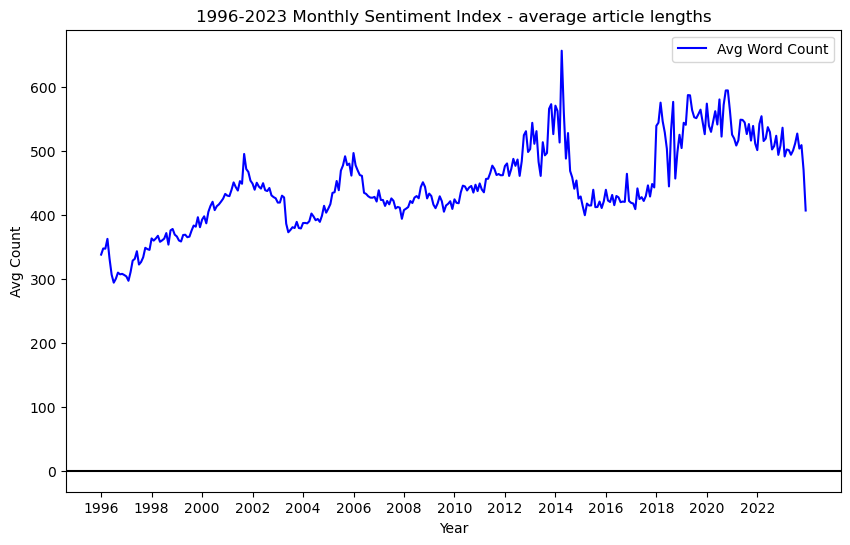

In [7]:
count = sentiments_df['avg_word_count']

x = range(len(sentiments_df['YearMon']))
x_labs = [str(i).split('-')[0] for i in sentiments_df['YearMon'].to_list()]
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, count, color='blue', label='Avg Word Count')

ax.set_title('1996-2023 Monthly Sentiment Index - average article lengths')
ax.set_xlabel('Year')
ax.set_ylabel('Avg Count')

ax.set_xticks(np.arange(min(x), max(x)+1, 24))
ax.set_xticklabels(x_labs[0:len(x_labs):24])
ax.axhline(y=0, color='black', linestyle='-')
ax.legend()

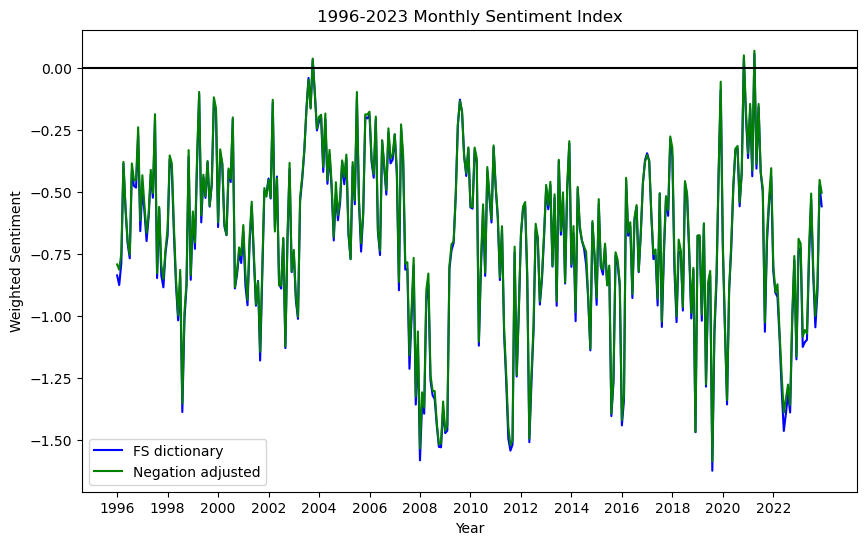

In [8]:
y_fs = sentiments_df['weighted_index']
y_neg = sentiments_df['weighted_index_neg']

x = range(len(sentiments_df['YearMon']))
x_labs = [str(i).split('-')[0] for i in sentiments_df['YearMon'].to_list()]
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, y_fs, color='blue', label='FS dictionary')
ax.plot(x, y_neg, color='green', label='Negation adjusted')

ax.set_title('1996-2023 Monthly Sentiment Index')
ax.set_xlabel('Year')
ax.set_ylabel('Weighted Sentiment')

ax.set_xticks(np.arange(min(x), max(x)+1, 24))
ax.set_xticklabels(x_labs[0:len(x_labs):24])
ax.axhline(y=0, color='black', linestyle='-')
ax.legend()

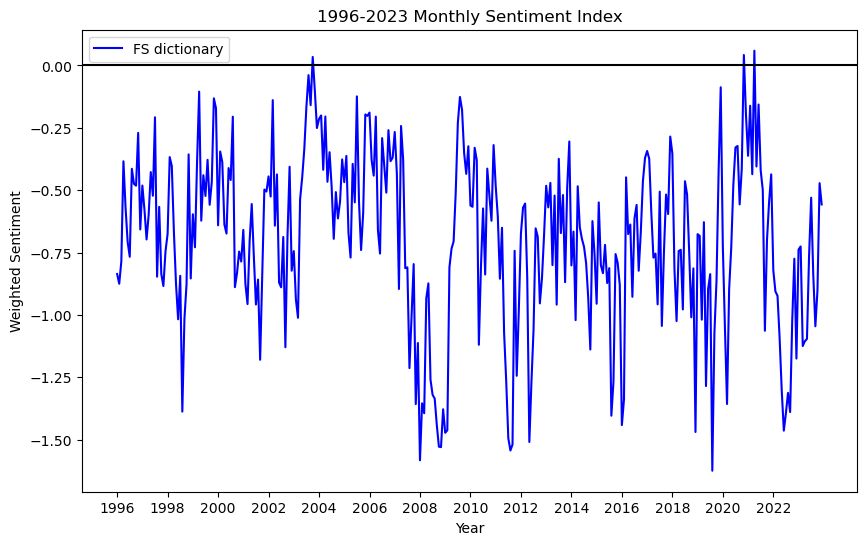

In [9]:
fs_df = sentiments_df #[sentiments_df['Type']=='FS_dict']
y_fs = fs_df['weighted_index']

x = range(len(fs_df['YearMon']))
x_labs = [str(i).split('-')[0] for i in fs_df['YearMon'].to_list()]
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, y_fs, color='blue', label='FS dictionary')

ax.set_title('1996-2023 Monthly Sentiment Index')
ax.set_xlabel('Year')
ax.set_ylabel('Weighted Sentiment')

ax.set_xticks(np.arange(min(x), max(x)+1, 24))
ax.set_xticklabels(x_labs[0:len(x_labs):24])
ax.axhline(y=0, color='black', linestyle='-')
ax.legend()

In [10]:
y_fs = sentiments_df['weighted_index'] - sentiments_df['weighted_index'].mean()
y_uncertainty = sentiments_df['uncertainty']

x = range(len(sentiments_df['YearMon']))
x_labs = [str(i).split('-')[0] for i in sentiments_df['YearMon'].to_list()]
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, y_fs, color='blue', label='Sentiment')
ax.plot(x, y_uncertainty, color='green', label='Disagreement')

ax.set_title('1996-2023 Monthly Sentiment Index - Demeaned')
ax.set_xlabel('Year')
ax.set_ylabel('Weighted Sentiment')

ax.set_xticks(np.arange(min(x), max(x)+1, 24))
ax.set_xticklabels(x_labs[0:len(x_labs):24])
ax.axhline(y=0, color='black', linestyle='-')
ax.legend()

KeyError: 'uncertainty'

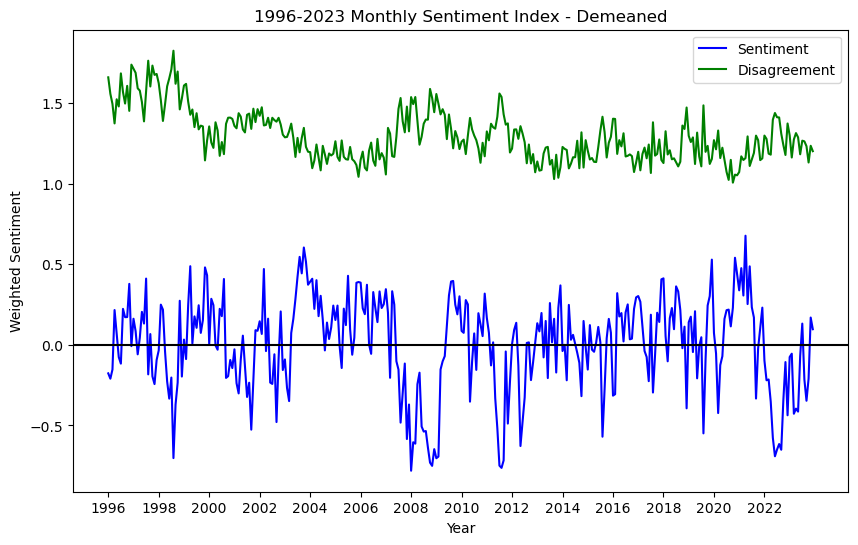

In [ ]:
fs_df = sentiments_df[sentiments_df['Type']=='FS_dict']
y_fs = fs_df['weighted_index'] - fs_df['weighted_index'].mean()
y_uncertainty = fs_df['uncertainty']

x = range(len(fs_df['YearMon']))
x_labs = [str(i).split('-')[0] for i in fs_df['YearMon'].to_list()]
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, y_fs, color='blue', label='Sentiment')
ax.plot(x, y_uncertainty, color='green', label='Disagreement')

ax.set_title('1996-2023 Monthly Sentiment Index - Demeaned')
ax.set_xlabel('Year')
ax.set_ylabel('Weighted Sentiment')

ax.set_xticks(np.arange(min(x), max(x)+1, 24))
ax.set_xticklabels(x_labs[0:len(x_labs):24])
ax.axhline(y=0, color='black', linestyle='-')
ax.legend()

In [ ]:
sentiments_df[sentiments_df['Year'] == 2011]

,Year,Month,Sentiment,Count,YearMon,weighted_index,uncertainty
0,2011,1,-9.987096,2396,2011-01-01,-0.416824,1.325004
1,2011,2,-11.287937,2214,2011-02-01,-0.509844,1.271239
2,2011,3,-16.167329,2266,2011-03-01,-0.713474,1.373664
3,2011,4,-13.354642,2346,2011-04-01,-0.569252,1.351173
4,2011,5,-19.077508,2077,2011-05-01,-0.918513,1.342796
5,2011,6,-27.459103,2490,2011-06-01,-1.102775,1.415513
6,2011,7,-39.260512,2939,2011-07-01,-1.335846,1.562343
7,2011,8,-44.444103,3297,2011-08-01,-1.348016,1.540161
8,2011,9,-32.979264,2529,2011-09-01,-1.304044,1.431286
9,2011,10,-11.906508,1904,2011-10-01,-0.625342,1.368655


[Text(0, 0, '1996'),
 Text(24, 0, '1998'),
 Text(48, 0, '2000'),
 Text(72, 0, '2002'),
 Text(96, 0, '2004'),
 Text(120, 0, '2006'),
 Text(144, 0, '2008'),
 Text(168, 0, '2010'),
 Text(192, 0, '2012'),
 Text(216, 0, '2014'),
 Text(240, 0, '2016'),
 Text(264, 0, '2018'),
 Text(288, 0, '2020'),
 Text(312, 0, '2022')]

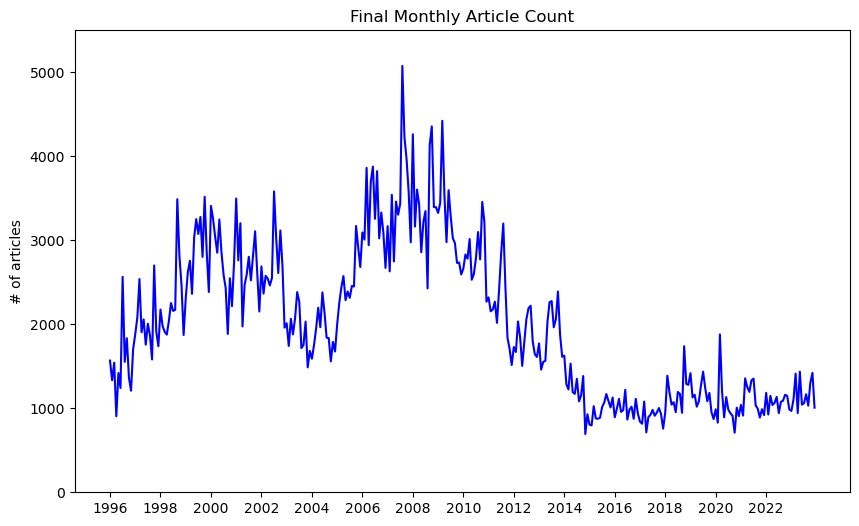

In [17]:
y_fs = sentiments_df['Count']

x = range(len(sentiments_df['YearMon']))
x_labs = [str(i).split('-')[0] for i in sentiments_df['YearMon'].to_list()]
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, y_fs, color='blue', label='FS dictionary')

ax.set_title('Final Monthly Article Count')
ax.set_ylabel('# of articles')
ax.set_ylim([0, 5500])

ax.set_xticks(np.arange(min(x), max(x)+1, 24))
ax.set_xticklabels(x_labs[0:len(x_labs):24])


In [15]:
sentiments_df = sentiments_df.sort_values(by=['YearMon'])
sentiments_df = sentiments_df.drop(['Sentiment', 'Sentiment_neg'], axis = 1)

#sentiments_df['weighted_index'] = sentiments_df['weighted_index']/100
#sentiments_df['uncertainty'] = sentiments_df['uncertainty']/100

In [17]:
sentiments_df.to_csv('path to output', index=False)

In [18]:
sentiments_df

,Year,Month,uncertainty_count,Count,YearMon,weighted_index,weighted_index_neg,uncertainty_index,avg_word_count,disagreement,disagreement_neg,weighted_index_dm
0,1996,1,208,1568,1996-01-01,-0.835935,-0.791540,13.265306,337.918367,1.696275,1.671954,-0.111316
1,1996,2,113,1334,1996-02-01,-0.874740,-0.813008,8.470765,347.515742,1.596304,1.594770,-0.132783
2,1996,3,131,1542,1996-03-01,-0.785030,-0.745854,8.495460,347.200389,1.549068,1.528371,-0.065630
3,1996,4,46,905,1996-04-01,-0.384140,-0.377832,5.082873,362.513812,1.424926,1.418178,0.302393
4,1996,5,74,1420,1996-05-01,-0.569025,-0.563907,5.211268,331.516197,1.585128,1.562422,0.116317
...,...,...,...,...,...,...,...,...,...,...,...,...
7,2023,8,146,1167,2023-08-01,-0.839452,-0.811604,12.510711,527.235647,1.341119,1.338530,-0.131379
8,2023,9,156,1031,2023-09-01,-1.045407,-0.998973,15.130941,503.740058,1.383639,1.399137,-0.318749
9,2023,10,327,1305,2023-10-01,-0.901184,-0.867776,25.057471,509.143295,1.241240,1.237872,-0.187551
10,2023,11,174,1421,2023-11-01,-0.471843,-0.450445,12.244898,470.145672,1.360360,1.360044,0.229780
